In [43]:
import pandas as pd 
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import geopandas as gpd
from shapely.geometry import Point, Polygon

In [44]:
air = pd.read_csv('air_modified.csv')

In [45]:
crs =  'epsg:4326'
geometry = [Point(xy) for xy in zip( air["longitude"], air["latitude"]  )] 
geo_air = gpd.GeoDataFrame(air, crs = crs, geometry = geometry)

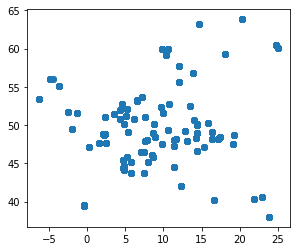

In [46]:
geo_air.plot()

In [47]:
shapefile = 'europe_map.shp'

# We set ISO_A2 since this is the country code style found in our Chernobyl dataset
gdf_europe = gpd.read_file(shapefile)
gdf_europe.columns = ['country', 'country_code', 'geometry']
gdf_europe.head()

,country,country_code,geometry
0,United Kingdom,GB,"MULTIPOLYGON (((-2.66768 51.62300, -2.74214 51..."
1,Switzerland,CH,"POLYGON ((9.52402 47.52422, 9.55439 47.51113, ..."
2,Sweden,SE,"MULTIPOLYGON (((19.07646 57.83594, 18.99375 57..."
3,Netherlands,NL,"MULTIPOLYGON (((5.99395 50.75044, 5.89246 50.7..."
4,Italy,IT,"MULTIPOLYGON (((7.02109 45.92578, 7.05576 45.9..."


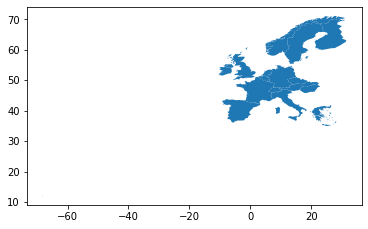

In [48]:
gdf_europe.plot()

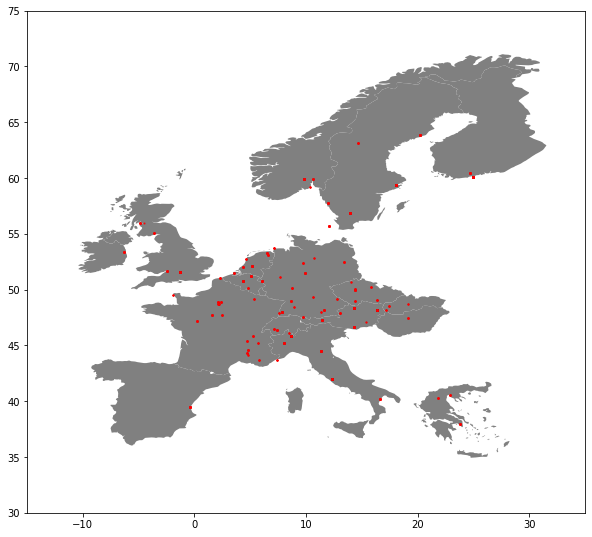

In [49]:
fig, ax = plt.subplots(figsize=(10, 10))

xlim = ([-15,  35])
ylim = ([30,  75])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

gdf_europe.plot(ax = ax, color = 'gray')
geo_air.plot(ax = ax, markersize = 1, color = 'r', alpha = 0.5)